In [28]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt

In [21]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2)

train = train_datagen.flow_from_directory('train/',
                                         batch_size=32,
                                         target_size=(128,128),
                                         class_mode='binary',
                                         shuffle=True,
                                         interpolation='nearest')

Found 680 images belonging to 2 classes.


In [22]:
test_datagen = ImageDataGenerator(rescale=1/255.)

test = test_datagen.flow_from_directory('test/',
                                        batch_size=32,
                                        target_size=(128,128),
                                        class_mode='binary',
                                        shuffle=True,
                                        interpolation='nearest')

Found 120 images belonging to 2 classes.


In [29]:
cnn = Sequential()

cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# cnn.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
# cnn.add(MaxPooling2D(pool_size=(2,2)))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.3))

cnn.add(Flatten())

cnn.add(Dense(units=64,activation='relu'))
cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dense(units=1,activation='sigmoid'))
cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 14, 14, 128)     

In [37]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,min_lr=0.001,factor=0.1)
model_checkpoint = ModelCheckpoint('checkpoint/',monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=90)

r = cnn.fit(train,
           epochs=100,
           batch_size=32,
           validation_data=test,
           callbacks=[reduce_lr,model_checkpoint,early_stopping])

Epoch 1/100
22/22 [==============================] - ETA: 0s - loss: 0.1992 - accuracy: 0.9412
Epoch 1: val_accuracy improved from -inf to 0.71667, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


22/22 [==============================] - 13s 580ms/step - loss: 0.1992 - accuracy: 0.9412 - val_loss: 1.0887 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - ETA: 0s - loss: 0.1821 - accuracy: 0.9279
Epoch 2: val_accuracy improved from 0.71667 to 0.75833, saving model to checkpoint\


INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


22/22 [==============================] - 14s 628ms/step - loss: 0.1821 - accuracy: 0.9279 - val_loss: 1.0866 - val_accuracy: 0.7583 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - ETA: 0s - loss: 0.1747 - accuracy: 0.9235
Epoch 3: val_accuracy did not improve from 0.75833
22/22 [==============================] - 12s 549ms/step - loss: 0.1747 - accuracy: 0.9235 - val_loss: 1.1148 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - ETA: 0s - loss: 0.1892 - accuracy: 0.9147
Epoch 4: val_accuracy did not improve from 0.75833
22/22 [==============================] - 11s 499ms/step - loss: 0.1892 - accuracy: 0.9147 - val_loss: 1.1259 - val_accuracy: 0.7417 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - ETA: 0s - loss: 0.1576 - accuracy: 0.9397
Epoch 5: val_accuracy did not improve from 0.75833
22/22 [==============================] - 11s 486ms/step - loss: 0.1576 - accuracy: 0.9397 - val_loss: 1.1656 - val_accuracy: 0.

Epoch 31/100
22/22 [==============================] - ETA: 0s - loss: 0.1071 - accuracy: 0.9588
Epoch 31: val_accuracy did not improve from 0.75833
22/22 [==============================] - 11s 491ms/step - loss: 0.1071 - accuracy: 0.9588 - val_loss: 1.5923 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 32/100
22/22 [==============================] - ETA: 0s - loss: 0.1308 - accuracy: 0.9500
Epoch 32: val_accuracy did not improve from 0.75833
22/22 [==============================] - 11s 498ms/step - loss: 0.1308 - accuracy: 0.9500 - val_loss: 1.6055 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 33/100
22/22 [==============================] - ETA: 0s - loss: 0.1326 - accuracy: 0.9471
Epoch 33: val_accuracy did not improve from 0.75833
22/22 [==============================] - 11s 491ms/step - loss: 0.1326 - accuracy: 0.9471 - val_loss: 1.5535 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 34/100
22/22 [==============================] - ETA: 0s - loss: 0.1295 - accuracy: 0.9412
Epoch 34: val_accuracy di

INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


22/22 [==============================] - 14s 631ms/step - loss: 0.0985 - accuracy: 0.9662 - val_loss: 1.8068 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 50/100
22/22 [==============================] - ETA: 0s - loss: 0.1952 - accuracy: 0.9324
Epoch 50: val_accuracy did not improve from 0.76667
22/22 [==============================] - 16s 699ms/step - loss: 0.1952 - accuracy: 0.9324 - val_loss: 1.9694 - val_accuracy: 0.6917 - lr: 0.0010
Epoch 51/100
22/22 [==============================] - ETA: 0s - loss: 0.2410 - accuracy: 0.9074
Epoch 51: val_accuracy did not improve from 0.76667
22/22 [==============================] - 14s 643ms/step - loss: 0.2410 - accuracy: 0.9074 - val_loss: 1.8615 - val_accuracy: 0.6583 - lr: 0.0010
Epoch 52/100
22/22 [==============================] - ETA: 0s - loss: 0.2186 - accuracy: 0.9176
Epoch 52: val_accuracy did not improve from 0.76667
22/22 [==============================] - 13s 607ms/step - loss: 0.2186 - accuracy: 0.9176 - val_loss: 1.2763 - val_accura

22/22 [==============================] - 13s 598ms/step - loss: 0.0834 - accuracy: 0.9765 - val_loss: 1.3646 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 78/100
22/22 [==============================] - ETA: 0s - loss: 0.0922 - accuracy: 0.9574
Epoch 78: val_accuracy did not improve from 0.76667
22/22 [==============================] - 19s 850ms/step - loss: 0.0922 - accuracy: 0.9574 - val_loss: 0.9776 - val_accuracy: 0.7583 - lr: 0.0010
Epoch 79/100
22/22 [==============================] - ETA: 0s - loss: 0.0983 - accuracy: 0.9603
Epoch 79: val_accuracy did not improve from 0.76667
22/22 [==============================] - 12s 539ms/step - loss: 0.0983 - accuracy: 0.9603 - val_loss: 1.6934 - val_accuracy: 0.7583 - lr: 0.0010
Epoch 80/100
22/22 [==============================] - ETA: 0s - loss: 0.1392 - accuracy: 0.9397
Epoch 80: val_accuracy did not improve from 0.76667
22/22 [==============================] - 13s 597ms/step - loss: 0.1392 - accuracy: 0.9397 - val_loss: 1.4292 - val_accura

INFO:tensorflow:Assets written to: checkpoint\assets


INFO:tensorflow:Assets written to: checkpoint\assets


22/22 [==============================] - 16s 710ms/step - loss: 0.0570 - accuracy: 0.9809 - val_loss: 1.3526 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 90/100
22/22 [==============================] - ETA: 0s - loss: 0.1127 - accuracy: 0.9559
Epoch 90: val_accuracy did not improve from 0.77500
22/22 [==============================] - 14s 601ms/step - loss: 0.1127 - accuracy: 0.9559 - val_loss: 1.5631 - val_accuracy: 0.6833 - lr: 0.0010
Epoch 91/100
22/22 [==============================] - ETA: 0s - loss: 0.1088 - accuracy: 0.9647
Epoch 91: val_accuracy did not improve from 0.77500
22/22 [==============================] - 13s 582ms/step - loss: 0.1088 - accuracy: 0.9647 - val_loss: 1.4574 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 92/100
22/22 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9853
Epoch 92: val_accuracy did not improve from 0.77500
22/22 [==============================] - 13s 591ms/step - loss: 0.0504 - accuracy: 0.9853 - val_loss: 1.4006 - val_accura

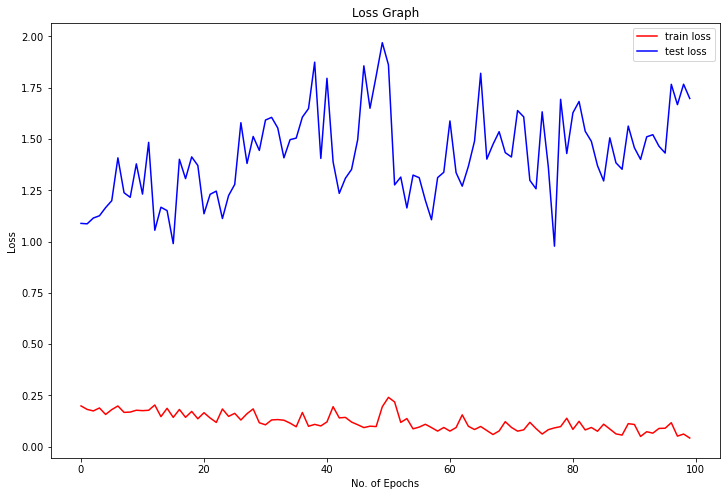

In [38]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

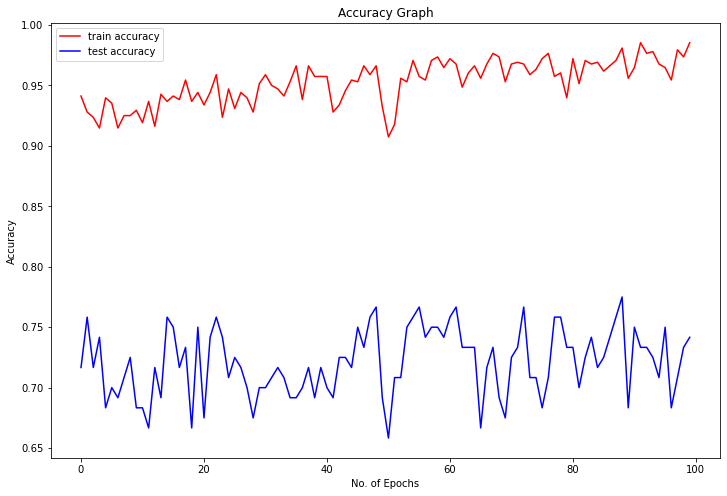

In [39]:
plt.figure(figsize=(12,8))
plt.plot(r.history['accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [40]:
cnn.save('children_adult_classifier.h5')
model = load_model('children_adult_classifier.h5')
model

In [43]:
loss, acc = cnn.evaluate(test)
print("Test Loss:",loss)
print("Test Accuracy:",acc)

4/4 [==============================] - 1s 113ms/step - loss: 1.6975 - accuracy: 0.7417
Test Loss: 1.6975151300430298
Test Accuracy: 0.7416666746139526
